In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [3]:
url='https://raw.githubusercontent.com/254samo/SolvedBI/master/On_Time_Performance.csv'
On_Time_Performance = pd.read_csv(url)

In [4]:
On_Time_Performance = On_Time_Performance[On_Time_Performance['Facility']=='JFK']
On_Time_Performance = On_Time_Performance.reset_index()
del On_Time_Performance['index']
On_Time_Performance.head()

,Facility,Date,Hour,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,% On-Time Gate Departures,% On-Time Airport Departures,% On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay
0,JFK,2019-06-01 00:00:00,0.0,8.0,10.0,9.0,20.0,66.67,55.56,40.00,15.11,22.33,5.27,19.11,6.0,3.07,11.65,34.20
1,JFK,2019-06-01 00:00:00,1.0,8.0,3.0,8.0,6.0,75.00,62.50,66.67,9.38,21.38,4.75,12.50,7.0,4.35,12.00,17.83
2,JFK,2019-06-01 00:00:00,2.0,5.0,2.0,5.0,1.0,100.00,100.00,100.00,0.80,16.00,1.08,1.00,0.0,6.70,2.00,13.00
3,JFK,2019-06-01 00:00:00,3.0,2.0,3.0,0.0,2.0,0.00,0.00,50.00,0.00,0.00,0.00,0.00,6.0,5.70,3.00,33.00
4,JFK,2019-06-01 00:00:00,4.0,1.0,1.0,2.0,0.0,100.00,100.00,0.00,2.50,16.50,1.20,1.00,0.0,0.00,0.00,0.00


In [5]:
On_Time_Performance['Date'] = pd.to_datetime(On_Time_Performance['Date'], errors='coerce')

In [7]:
On_Time_Performance['month'] = On_Time_Performance['Date'].dt.month
On_Time_Performance['weekday'] = On_Time_Performance['Date'].dt.day_name()
On_Time_Performance['80% or More On Time'] = 0
On_Time_Performance.loc[On_Time_Performance['% On-Time Gate Arrivals'] >= 80, '80% or More On Time'] = 1

In [8]:
On_Time_Performance.head()

,Facility,Date,Hour,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,% On-Time Gate Departures,% On-Time Airport Departures,% On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay,month,weekday,80% or More On Time
0,JFK,2019-06-01,0.0,8.0,10.0,9.0,20.0,66.67,55.56,40.00,15.11,22.33,5.27,19.11,6.0,3.07,11.65,34.20,6,Saturday,0
1,JFK,2019-06-01,1.0,8.0,3.0,8.0,6.0,75.00,62.50,66.67,9.38,21.38,4.75,12.50,7.0,4.35,12.00,17.83,6,Saturday,0
2,JFK,2019-06-01,2.0,5.0,2.0,5.0,1.0,100.00,100.00,100.00,0.80,16.00,1.08,1.00,0.0,6.70,2.00,13.00,6,Saturday,1
3,JFK,2019-06-01,3.0,2.0,3.0,0.0,2.0,0.00,0.00,50.00,0.00,0.00,0.00,0.00,6.0,5.70,3.00,33.00,6,Saturday,0
4,JFK,2019-06-01,4.0,1.0,1.0,2.0,0.0,100.00,100.00,0.00,2.50,16.50,1.20,1.00,0.0,0.00,0.00,0.00,6,Saturday,0


In [ ]:
On_Time_Performance['month'] = On_Time_Performance['month'].apply(str)
On_Time_Performance = pd.get_dummies(On_Time_Performance, drop_first=True)
On_Time_Performance.head()

In [10]:
peakHours = On_Time_Performance.loc[((On_Time_Performance['Hour']>=6) & (On_Time_Performance['Hour']<= 9)) | ((On_Time_Performance['Hour'] >= 15) & (On_Time_Performance['Hour']<= 18)) | ((On_Time_Performance['Hour']>= 20)) | ((On_Time_Performance['Hour']<= 1))]
peakHours['Hour'] = peakHours['Hour'].apply(str)
peakHours = pd.get_dummies(peakHours)
peakHours.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,% On-Time Gate Departures,% On-Time Airport Departures,% On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay,80% or More On Time,month_7,month_8,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Hour_0.0,Hour_1.0,Hour_15.0,Hour_16.0,Hour_17.0,Hour_18.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0,Hour_6.0,Hour_7.0,Hour_8.0,Hour_9.0
0,2019-06-01,8.0,10.0,9.0,20.0,66.67,55.56,40.00,15.11,22.33,5.27,19.11,6.00,3.07,11.65,34.20,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-06-01,8.0,3.0,8.0,6.0,75.00,62.50,66.67,9.38,21.38,4.75,12.50,7.00,4.35,12.00,17.83,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,2019-06-01,19.0,20.0,19.0,25.0,100.00,100.00,80.00,0.32,21.11,3.99,2.26,8.32,4.39,0.36,6.96,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,2019-06-01,31.0,29.0,33.0,30.0,93.94,90.91,80.00,2.73,21.48,4.39,5.52,14.30,2.68,2.07,14.83,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,2019-06-01,44.0,10.0,44.0,13.0,93.18,75.00,76.92,2.86,27.39,9.30,10.27,0.92,3.44,4.15,79.69,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [12]:
offPeak = On_Time_Performance.loc[((On_Time_Performance['Hour']>=2) & (On_Time_Performance['Hour']<= 5)) | ((On_Time_Performance['Hour'] >= 10) & (On_Time_Performance['Hour']<= 14)) | ((On_Time_Performance['Hour']== 19))]
offPeak['Hour'] = offPeak['Hour'].apply(str)
offPeak = pd.get_dummies(offPeak)
offPeak.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,% On-Time Gate Departures,% On-Time Airport Departures,% On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay,80% or More On Time,month_7,month_8,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Hour_10.0,Hour_11.0,Hour_12.0,Hour_13.0,Hour_14.0,Hour_19.0,Hour_2.0,Hour_3.0,Hour_4.0,Hour_5.0
2,2019-06-01,5.0,2.0,5.0,1.0,100.00,100.00,100.00,0.80,16.00,1.08,1.00,0.00,6.70,2.00,13.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2019-06-01,2.0,3.0,0.0,2.0,0.00,0.00,50.00,0.00,0.00,0.00,0.00,6.00,5.70,3.00,33.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2019-06-01,1.0,1.0,2.0,0.0,100.00,100.00,0.00,2.50,16.50,1.20,1.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,2019-06-01,8.0,19.0,8.0,21.0,87.50,87.50,80.95,18.50,22.50,6.00,22.50,5.33,4.92,4.81,57.10,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10,2019-06-01,19.0,24.0,22.0,25.0,81.82,77.27,84.00,26.95,28.86,11.52,34.14,2.20,1.84,1.96,14.72,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [13]:
peakHours.count()

Date                                 1288
Scheduled Departures                 1288
Scheduled Arrivals                   1288
Departures For Metric Computation    1288
Arrivals For Metric Computation      1288
% On-Time Gate Departures            1288
% On-Time Airport Departures         1288
% On-Time Gate Arrivals              1288
Average Gate Departure Delay         1288
Average Taxi Out Time                1288
Average Taxi Out Delay               1288
Average Airport Departure Delay      1288
Average Airborne Delay               1288
Average Taxi In Delay                1288
Average Block Delay                  1288
Average Gate Arrival Delay           1288
80% or More On Time                  1288
month_7                              1288
month_8                              1288
weekday_Monday                       1288
weekday_Saturday                     1288
weekday_Sunday                       1288
weekday_Thursday                     1288
weekday_Tuesday                   

In [14]:
offPeak.count()

Date                                 920
Scheduled Departures                 920
Scheduled Arrivals                   920
Departures For Metric Computation    920
Arrivals For Metric Computation      920
% On-Time Gate Departures            920
% On-Time Airport Departures         920
% On-Time Gate Arrivals              920
Average Gate Departure Delay         920
Average Taxi Out Time                920
Average Taxi Out Delay               920
Average Airport Departure Delay      920
Average Airborne Delay               920
Average Taxi In Delay                920
Average Block Delay                  920
Average Gate Arrival Delay           920
80% or More On Time                  920
month_7                              920
month_8                              920
weekday_Monday                       920
weekday_Saturday                     920
weekday_Sunday                       920
weekday_Thursday                     920
weekday_Tuesday                      920
weekday_Wednesda

In [15]:
On_Time_Performance.count()

Date                                 2208
Hour                                 2208
Scheduled Departures                 2208
Scheduled Arrivals                   2208
Departures For Metric Computation    2208
Arrivals For Metric Computation      2208
% On-Time Gate Departures            2208
% On-Time Airport Departures         2208
% On-Time Gate Arrivals              2208
Average Gate Departure Delay         2208
Average Taxi Out Time                2208
Average Taxi Out Delay               2208
Average Airport Departure Delay      2208
Average Airborne Delay               2208
Average Taxi In Delay                2208
Average Block Delay                  2208
Average Gate Arrival Delay           2208
80% or More On Time                  2208
month_7                              2208
month_8                              2208
weekday_Monday                       2208
weekday_Saturday                     2208
weekday_Sunday                       2208
weekday_Thursday                  

In [16]:
peakHours = peakHours.drop(['Average Gate Departure Delay','Average Airport Departure Delay','Average Gate Arrival Delay','Scheduled Departures', 'Scheduled Arrivals', 'Date', '% On-Time Gate Arrivals',], axis=1)
offPeak = offPeak.drop(['Average Gate Departure Delay','Average Airport Departure Delay','Average Gate Arrival Delay','Scheduled Departures', 'Scheduled Arrivals', 'Date', '% On-Time Gate Arrivals',], axis=1)

In [17]:
from sklearn.model_selection import train_test_split
peakX_train, peakX_test, peaky_train, peaky_test = train_test_split(peakHours.drop('80% or More On Time',axis=1),
 peakHours['80% or More On Time'], test_size=0.30,
 random_state=101)

In [18]:
from sklearn.model_selection import train_test_split
offX_train, offX_test, offy_train, offy_test = train_test_split(offPeak.drop('80% or More On Time',axis=1),
 offPeak['80% or More On Time'], test_size=0.30,
 random_state=101)

In [19]:
from sklearn.preprocessing import StandardScaler

peakFeatureTrain = peakX_train
offFeatureTrain = offX_train

peakFeatureTest = peakX_test
offFeatureTest = offX_test


sc = StandardScaler()
sc.fit(peakX_train)
peakX_train = sc.transform(peakX_train)
peakX_test = sc.transform(peakX_test)

sc2 = StandardScaler()
sc2.fit(offX_train)
offX_train = sc2.transform(offX_train)
offX_test = sc2.transform(offX_test)

peakX_train = pd.DataFrame(data=peakX_train, columns=peakFeatureTrain.columns)
peakX_test = pd.DataFrame(data=peakX_test, columns=peakFeatureTest.columns)

offX_train = pd.DataFrame(data=offX_train, columns=offFeatureTrain.columns)
offX_test = pd.DataFrame(data=offX_test, columns=offFeatureTest.columns)

# Logistic Regression

### Peak

In [20]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model
logmodelPeak = LogisticRegression()
logmodelPeak.fit(peakX_train, peaky_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
predictionsPeak = logmodelPeak.predict(peakX_test)

In [22]:
# Determine the model performance metrics
from sklearn.metrics import classification_report
print(classification_report(peaky_test,predictionsPeak))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       256
           1       0.62      0.69      0.66       131

    accuracy                           0.75       387
   macro avg       0.73      0.74      0.73       387
weighted avg       0.76      0.75      0.76       387



In [23]:
 # Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(peaky_test, predictionsPeak))

[[201  55]
 [ 40  91]]


### Off Peak

In [24]:
logmodelOff = LogisticRegression()
logmodelOff.fit(offX_train, offy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
predictionsOff = logmodelOff.predict(offX_test)

In [26]:
# Determine the model performance metrics
from sklearn.metrics import classification_report
print(classification_report(offy_test,predictionsOff))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       131
           1       0.68      0.75      0.71       145

    accuracy                           0.68       276
   macro avg       0.69      0.68      0.68       276
weighted avg       0.69      0.68      0.68       276



In [27]:
 # Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(offy_test, predictionsOff))

[[ 80  51]
 [ 36 109]]


### Logistic Regression ROC Curves

In [28]:
# Receiver Operating Curve (ROC)
peakY_scores = logmodelPeak.decision_function(peakX_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(peaky_test, peakY_scores)

In [29]:
 # Area Under the Curve (AUC)
from sklearn.metrics import auc
auc(fpr, tpr)

0.8376669847328244

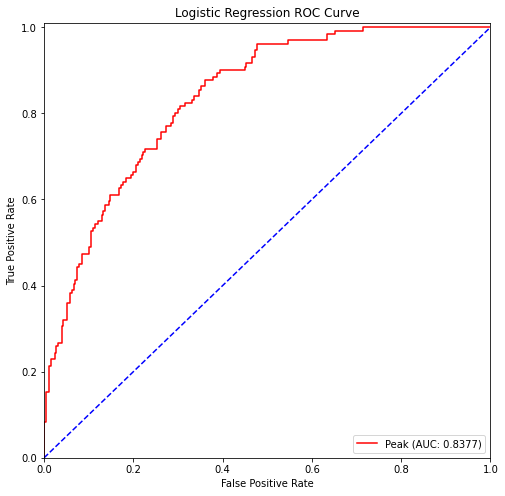

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', label='Peak (AUC: %.4f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [31]:
# Receiver Operating Curve (ROC)
offY_scores = logmodelOff.decision_function(offX_test)
from sklearn.metrics import roc_curve
fprOff, tprOff, thresholdsOff = roc_curve(offy_test, offY_scores)

In [32]:
 # Area Under the Curve (AUC)
from sklearn.metrics import auc
offScore = auc(fprOff, tprOff)
offScore

0.7675177678336405

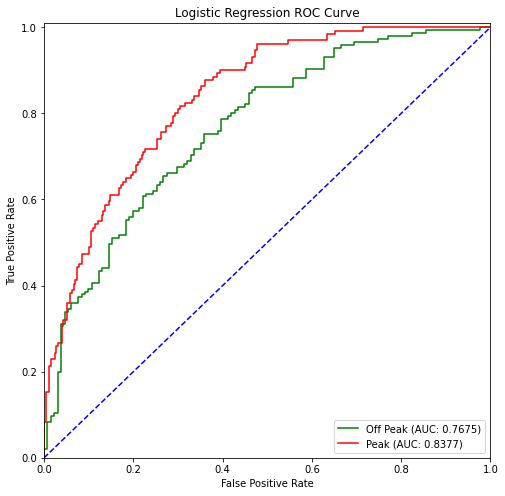

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.plot(fprOff, tprOff, color='green', label='Off Peak (AUC: %.4f)'
% auc(fprOff, tprOff))
plt.plot(fpr, tpr, color='red', label='Peak (AUC: %.4f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# KNN

### Peak

In [34]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knnPeak = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knnPeak = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gsPeak = GridSearchCV(knnPeak, params_knnPeak, cv=5)
#fit model to training data
knn_gsPeak.fit(peakX_train, peaky_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
#save best model
knn_bestPeak = knn_gsPeak.best_estimator_
#check best n_neigbors value
print(knn_gsPeak.best_params_)
knnPredictionsPeak = knn_gsPeak.predict(peakX_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(peaky_test, knnPredictionsPeak))

{'n_neighbors': 12}
[[207  49]
 [ 76  55]]


In [36]:
# Determine the model performance metrics
from sklearn.metrics import classification_report
print(classification_report(peaky_test,knnPredictionsPeak))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       256
           1       0.53      0.42      0.47       131

    accuracy                           0.68       387
   macro avg       0.63      0.61      0.62       387
weighted avg       0.66      0.68      0.67       387



### Off Peak

In [37]:
#create new a knn model
knnOff = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knnOff = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gsOff = GridSearchCV(knnOff, params_knnOff, cv=5)
#fit model to training data
knn_gsOff.fit(offX_train, offy_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
#save best model
knn_bestOff = knn_gsOff.best_estimator_
#check best n_neigbors value
print(knn_gsOff.best_params_)
knnPredictionsOff = knn_gsOff.predict(offX_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(offy_test, knnPredictionsOff))

{'n_neighbors': 22}
[[78 53]
 [49 96]]


In [39]:
# Determine the model performance metrics
from sklearn.metrics import classification_report
print(classification_report(offy_test,knnPredictionsOff))

              precision    recall  f1-score   support

           0       0.61      0.60      0.60       131
           1       0.64      0.66      0.65       145

    accuracy                           0.63       276
   macro avg       0.63      0.63      0.63       276
weighted avg       0.63      0.63      0.63       276



### KNN ROC Curves

In [40]:
y_scoresPeak = knn_gsPeak.predict_proba(peakX_test)
fpr, tpr, threshold = roc_curve(peaky_test, y_scoresPeak[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc

0.7025584446564885

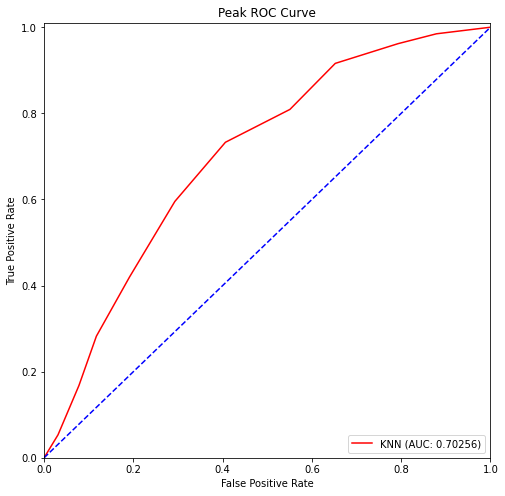

In [41]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', label='KNN (AUC: %.5f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('Peak ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [42]:
y_scoresOff = knn_gsOff.predict_proba(offX_test)
fprOff, tprOff, thresholdOff = roc_curve(offy_test, y_scoresOff[:, 1])
roc_aucOff = auc(fprOff, tprOff)
roc_aucOff

0.6929191892603317

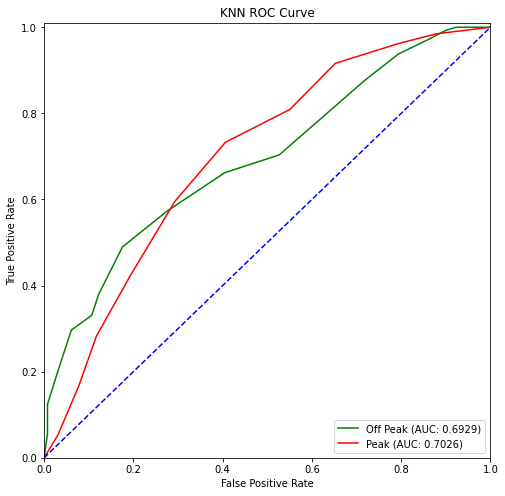

In [43]:
plt.figure(figsize=(8, 8))
plt.plot(fprOff, tprOff, color='green', label='Off Peak (AUC: %.4f)'
% auc(fprOff, tprOff))
plt.plot(fpr, tpr, color='red', label='Peak (AUC: %.4f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Random Forest

### Peak

In [44]:
from sklearn.ensemble import RandomForestClassifier

#create a new random forest classifier
rfPeak = RandomForestClassifier(random_state=137)
#create a dictionary of all values we want to test for n_estimators
params_rfPeak = {"n_estimators": [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gsPeak = GridSearchCV(rfPeak, params_rfPeak, cv=5)
#fit model to training data
rf_gsPeak.fit(peakX_train, peaky_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=137,
                                 

In [45]:
#save best model
rf_bestPeak = rf_gsPeak.best_estimator_
#check best n_estimators value
print(rf_gsPeak.best_params_)
rfPredictionsPeak = rf_gsPeak.predict(peakX_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(peaky_test, rfPredictionsPeak))

{'n_estimators': 100}
[[215  41]
 [ 44  87]]


In [46]:
# Determine the model performance metrics
from sklearn.metrics import classification_report
print(classification_report(peaky_test,rfPredictionsPeak))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       256
           1       0.68      0.66      0.67       131

    accuracy                           0.78       387
   macro avg       0.75      0.75      0.75       387
weighted avg       0.78      0.78      0.78       387



### Off Peak

In [47]:
#create a new random forest classifier
rfOff = RandomForestClassifier(random_state=137)
#create a dictionary of all values we want to test for n_estimators
params_rfOff = {"n_estimators": [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gsOff = GridSearchCV(rfOff, params_rfOff, cv=5)
#fit model to training data
rf_gsOff.fit(offX_train, offy_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=137,
                                 

In [48]:
#save best model
rf_bestOff = rf_gsOff.best_estimator_
#check best n_estimators value
print(rf_gsOff.best_params_)
rfPredictionsOff = rf_gsOff.predict(offX_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(offy_test, rfPredictionsOff))

{'n_estimators': 100}
[[ 88  43]
 [ 27 118]]


In [49]:
# Determine the model performance metrics
from sklearn.metrics import classification_report
print(classification_report(offy_test,rfPredictionsOff))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       131
           1       0.73      0.81      0.77       145

    accuracy                           0.75       276
   macro avg       0.75      0.74      0.74       276
weighted avg       0.75      0.75      0.74       276



### Random Forest ROC Curves

In [50]:
y_scoresPeak = rf_gsPeak.predict_proba(peakX_test)
fpr, tpr, threshold = roc_curve(peaky_test, y_scoresPeak[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc

0.8426616173664121

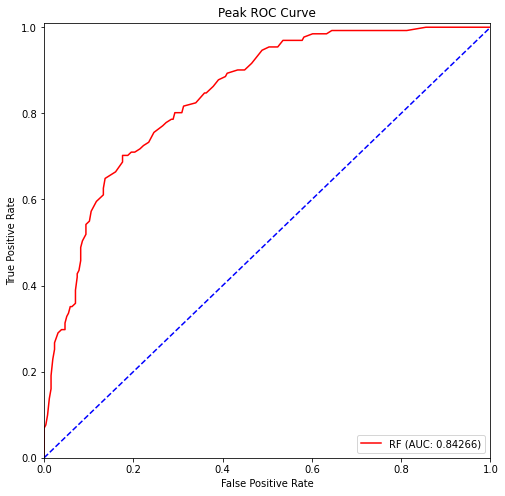

In [51]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', label='RF (AUC: %.5f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('Peak ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [52]:
y_scoresOff = rf_gsOff.predict_proba(offX_test)
fprOff, tprOff, thresholdOff = roc_curve(offy_test, y_scoresOff[:, 1])
roc_aucOff = auc(fprOff, tprOff)
roc_aucOff

0.8120558041589891

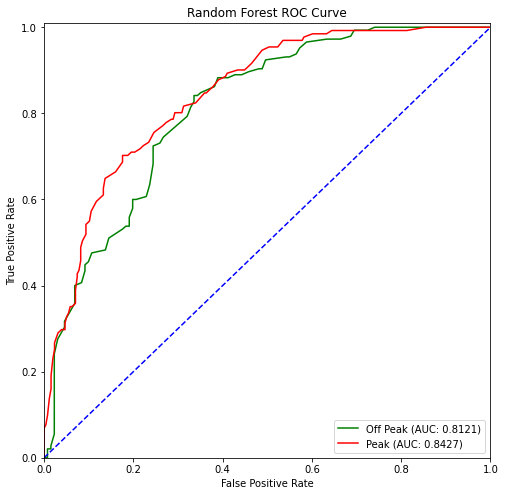

In [53]:
plt.figure(figsize=(8, 8))
plt.plot(fprOff, tprOff, color='green', label='Off Peak (AUC: %.4f)'
% auc(fprOff, tprOff))
plt.plot(fpr, tpr, color='red', label='Peak (AUC: %.4f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Ensemble Model

### Peak

In [54]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('knn', knn_bestPeak), ('rf', rf_bestPeak), ('log_reg', logmodelPeak)]
#create our voting classifier, inputting our models
ensemblePeak = VotingClassifier(estimators, voting='soft', weights=[1,2,2])

In [55]:
#fit model to training data
ensemblePeak.fit(peakX_train, peaky_train)
#test our model on the test data
ensemblePeak.score(peakX_test, peaky_test)

0.7622739018087855

In [56]:
ensemblePredictionsPeak = ensemblePeak.predict(peakX_test)
# Determine the model performance metrics
from sklearn.metrics import classification_report
print(classification_report(peaky_test,ensemblePredictionsPeak))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       256
           1       0.64      0.66      0.65       131

    accuracy                           0.76       387
   macro avg       0.73      0.74      0.74       387
weighted avg       0.76      0.76      0.76       387



In [57]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(peaky_test, ensemblePredictionsPeak))

[[208  48]
 [ 44  87]]


### Off Peak

In [58]:
#create a dictionary of our models
estimators=[('knn', knn_bestOff), ('rf', rf_bestOff), ('log_reg', logmodelOff)]
#create our voting classifier, inputting our models
ensembleOff = VotingClassifier(estimators, voting='soft')

In [59]:
#fit model to training data
ensembleOff.fit(offX_train, offy_train)
#test our model on the test data
ensembleOff.score(offX_test, offy_test)

0.717391304347826

In [60]:
ensemblePredictionsOff = ensembleOff.predict(offX_test)
# Determine the model performance metrics
from sklearn.metrics import classification_report
print(classification_report(offy_test,ensemblePredictionsOff))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       131
           1       0.71      0.79      0.75       145

    accuracy                           0.72       276
   macro avg       0.72      0.71      0.71       276
weighted avg       0.72      0.72      0.72       276



In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(offy_test, ensemblePredictionsOff))

[[ 83  48]
 [ 30 115]]


### Ensemble ROC Curves

No Skill: ROC AUC=0.50000
Ensemble: ROC AUC=0.84080


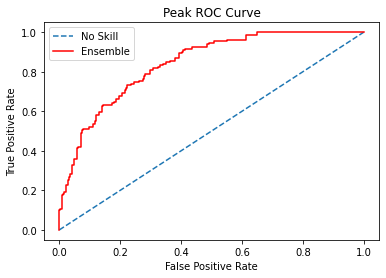

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(peaky_test))]

# predict probabilities
lr_probs = ensemblePeak.predict_proba(peakX_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(peaky_test, ns_probs)
lr_auc = roc_auc_score(peaky_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.5f' % (ns_auc))
print('Ensemble: ROC AUC=%.5f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(peaky_test, ns_probs)
lr_fpr, lr_tpr, _off = roc_curve(peaky_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, color='red', label='Ensemble')
# title
plt.title('Peak ROC Curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.50000
Ensemble: ROC AUC=0.84080


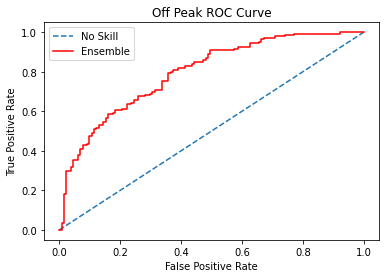

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probsoff = [0 for _ in range(len(offy_test))]

# predict probabilities
lr_probsoff = ensembleOff.predict_proba(offX_test)
# keep probabilities for the positive outcome only
lr_probsoff = lr_probsoff[:, 1]
# calculate scores

lr_aucoff = roc_auc_score(offy_test, lr_probsoff)
# summarize scores
print('No Skill: ROC AUC=%.5f' % (ns_auc))
print('Ensemble: ROC AUC=%.5f' % (lr_auc))
# calculate roc curves

lr_fproff, lr_tproff, _off = roc_curve(offy_test, lr_probsoff)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fproff, lr_tproff, color='red', label='Ensemble')
# title
plt.title('Off Peak ROC Curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

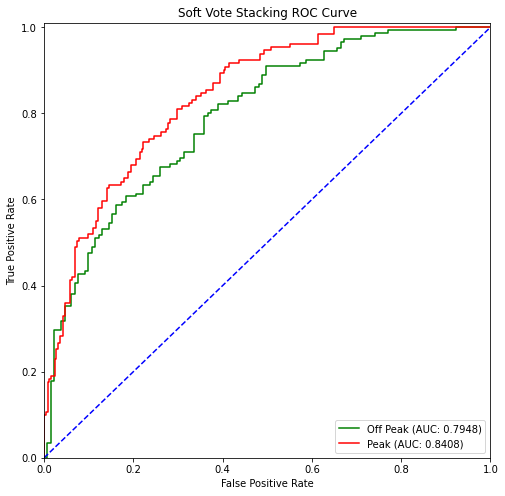

In [64]:
plt.figure(figsize=(8, 8))
plt.plot(lr_fproff, lr_tproff, color='green', label='Off Peak (AUC: %.4f)'
% auc(lr_fproff, lr_tproff))
plt.plot(lr_fpr, lr_tpr, color='red', label='Peak (AUC: %.4f)'
% auc(lr_fpr, lr_tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('Soft Vote Stacking ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

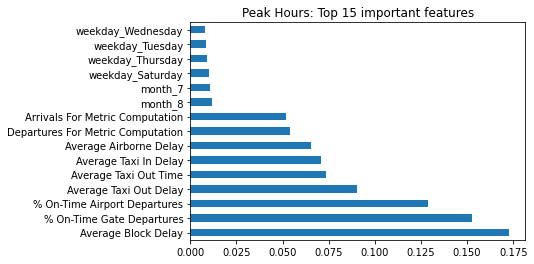

In [65]:
rfPeak.fit(peakX_train, peaky_train)
feat_importances = pd.Series(rfPeak.feature_importances_, index=peakX_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Peak Hours: Top 15 important features")
plt.show()

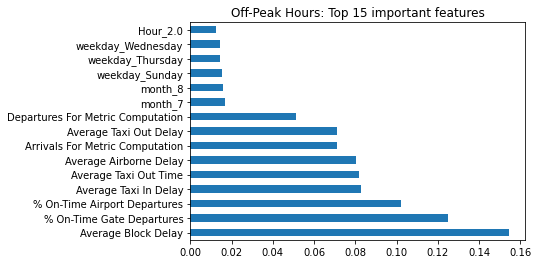

In [66]:
rfOff.fit(offX_train, offy_train)
feat_importances = pd.Series(rfOff.feature_importances_, index=offX_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Off-Peak Hours: Top 15 important features")
plt.show()

In [ ]:
#!pip install lime

In [70]:
import lime
import lime.lime_tabular


In [71]:
predict_fn_rf = lambda x: rf_gsPeak.predict_proba(x).astype(float)
X = peakX_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = peakX_train.columns,class_names=['< 80%','>= 80%'],kernel_width=5)

In [73]:
new_series = pd.Series(rf_gsPeak.predict(peakX_test))
testy = peaky_test.reset_index().drop(['index'], axis=1)

df5 = pd.concat([testy, new_series], axis=1)

df5.head(5)

,80% or More On Time,0
0,0,1
1,0,0
2,0,1
3,0,1
4,0,0


In [74]:
pd.set_option('display.max_columns', 999)
peakFeatureTest.iloc[[149]]
peaky_test.iloc[[374]]

1680    0
Name: 80% or More On Time, dtype: int64

In [75]:
choosen_instance = peakX_test.iloc[[374]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

In [ ]:
choosen_instance = peakX_test.iloc[[39]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

In [ ]:
predict_fn_rf2 = lambda x: rf_gsOff.predict_proba(x).astype(float)
X2 = offX_train.values
explainer2 = lime.lime_tabular.LimeTabularExplainer(X2,feature_names = offX_train.columns,class_names=['< 80%','>= 80%'],kernel_width=5)

In [ ]:
choosen_instance = offX_test.iloc[[74]].values[0]
exp = explainer2.explain_instance(choosen_instance, predict_fn_rf2,num_features=10)
exp.show_in_notebook(show_all=False)

In [ ]:
On_Time_Performance.groupby('Hour')[['80% or More On Time']].sum().plot()